# HOMEWORK 3 :    

**VIGNESH PRABHAKAR**<br>
**USC ID:** : 4024890667

Time Series Classification.
An interesting task in machine learning is classification of time series. In this problem,
we will classify the activities of humans based on time series obtained by a Wireless
Sensor Network.

The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity.1 Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13,
vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains
6 time series and each time series has 480 consecutive values

# 1) (a) and 1)(b)

**Mounted the google drive** 

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# 1) (c) (i) Time-domain features that are usually used in time series classification 

**Feature Extraction of time-domain features**

In time-series classification some of the commonly used time-domain features are </br>

Maximum<br>
IQR</br>
Median </br>
25th percentile or 1st quartile </br>
75th percentile or 3rd quartile </br>
Mean</br>
Minimum</br>
Kurtosis</br>
Skewness </br>
Range</br>


Stored the various activities , time series and the time domain features in the given activity recognition system based on multisensor data fusion dataset .

In [0]:
import os
import pandas as pd

activities=['bending1','bending2','cycling','lying','sitting','standing','walking']

time_series =['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

time_domain_features =["min ","max","mean","median","stdev","first_quartile","third_quartile"]

tdf_time_series =list()

for i in time_series :
  for j in range(len(time_domain_features)):
    tdf_time_series.append(time_domain_features[j] +"of"+i)


# 1) (c) (ii) Extracted the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance

**Extraction of the time domain features for all the given time series in each instance namely <br>"min","max","mean","median","std deviation","first quartile","third quartile"**

In [0]:
import numpy as np
import statistics

lst=list()
for i in activities:
  location="/gdrive/My Drive/Homeworks/AReM/"+str(i)
  for name in os.listdir(location):
    df1 =pd.read_csv(location+'/'+name,skiprows=4,usecols=range(1,7))
    stats_tdf=[]
    for t in time_series:
        stats_tdf.append(np.min(df1[t]))
        stats_tdf.append(np.max(df1[t]))
        stats_tdf.append(np.mean(df1[t]))
        stats_tdf.append(np.median(df1[t]))
        stats_tdf.append(np.std(df1[t]))        
        stats_tdf.append(np.percentile(df1[t],0.25))
        stats_tdf.append(np.percentile(df1[t],0.75))
    lst.append(stats_tdf)
    
    
df_tdf=pd.DataFrame(lst,columns=tdf_time_series)
df_tdf.fillna(df_tdf.mean(),inplace=True)
df_tdf.head()



/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


min ofavg_rss12  ...  third_quartileofvar_rss23
0            38.00  ...                        0.0
1            37.25  ...                        0.0
2            35.00  ...                        0.0
3            33.00  ...                        0.0
4            33.00  ...                        0.0

[5 rows x 42 columns]

# 1) (c) (iii) Bootstrapped confidence interval for the standard deviation of each extracted time domain feature in the dataframe 

Estimation of the standard deviation for each time domain feature that has been extracted 

In [0]:
stdev_estimate= df_tdf.describe()[df_tdf.describe().index == 'std'].transpose()

stdev_estimate

std
min ofavg_rss12            9.568541
maxofavg_rss12             4.183493
meanofavg_rss12            5.246019
medianofavg_rss12          5.355577
stdevofavg_rss12           1.759237
first_quartileofavg_rss12  8.136756
third_quartileofavg_rss12  7.861483
min ofvar_rss12            0.000000
maxofvar_rss12             5.030493
meanofvar_rss12            1.568813
medianofvar_rss12          1.405398
stdevofvar_rss12           0.879851
first_quartileofvar_rss12  0.046617
third_quartileofvar_rss12  0.112114
min ofavg_rss13            2.937487
maxofavg_rss13             4.792067
meanofavg_rss13            3.953833
medianofavg_rss13          3.986577
stdevofavg_rss13           0.945537
first_quartileofavg_rss13  3.398377
third_quartileofavg_rss13  3.710839
min ofvar_rss13            0.000000
maxofvar_rss13             2.169234
meanofvar_rss13            1.161534
medianofvar_rss13          1.141971
stdevofvar_rss13           0.455494
first_quartileofvar_rss13  0.015496
third_quartileofvar_rss13  0.106809
min ofavg_rss23            6.085924
maxofavg_rss23             5.740079
meanofavg_rss23            5.671149
medianofavg_rss23          5.810683
stdevofavg_rss23           1.005474
first_quartileofavg_rss23  6.211311
third_quartileofavg_rss23  6.333026
min ofvar_rss23            0.045835
maxofvar_rss23             2.518912
meanofvar_rss23            1.150552
medianofvar_rss23          1.083576
stdevofvar_rss23           0.513453
first_quartileofvar_rss23  0.078797
third_quartileofvar_rss23  0.125414

**Creating Bootstrap confidence intervals** <br>

Generated a 90% bootstrap confidence interval for the bootstrapped samples taken from the dataframe which had been generated using the time domain features for all the given time series of various instances. Ran the bootstrap for a 1000 iterations and then attained [50,950] as the bootstrap confidence interval for each feature in the generated dataframe 

In [0]:
from sklearn.utils import resample


lower_bound_confidence={}
upper_bound_confidence={}
noofiterations = 1000
t = df_tdf.columns
for k in list(t):
  results =[]
  for j in range(noofiterations):
    resamp=resample(df_tdf[k])
    results.append(np.std(resamp))
  results.sort()
  lower_bound_confidence[k]=results[49]
  upper_bound_confidence[k]=results[949]
  
stdev_estimate["lower bound confidence"] = pd.Series(lower_bound_confidence)
stdev_estimate["upper bound confidence"] = pd.Series(upper_bound_confidence)


In [0]:
stdev_estimate

std  ...  upper bound confidence
min ofavg_rss12            9.568541  ...               10.590862
maxofavg_rss12             4.183493  ...                5.104407
meanofavg_rss12            5.246019  ...                5.778306
medianofavg_rss12          5.355577  ...                5.926988
stdevofavg_rss12           1.759237  ...                1.932314
first_quartileofavg_rss12  8.136756  ...                8.744695
third_quartileofavg_rss12  7.861483  ...                8.407891
min ofvar_rss12            0.000000  ...                0.000000
maxofvar_rss12             5.030493  ...                5.335756
meanofvar_rss12            1.568813  ...                1.684775
medianofvar_rss12          1.405398  ...                1.526091
stdevofvar_rss12           0.879851  ...                0.928602
first_quartileofvar_rss12  0.046617  ...                0.078355
third_quartileofvar_rss12  0.112114  ...                0.140547
min ofavg_rss13            2.937487  ...                3.055693
maxofavg_rss13             4.792067  ...                5.365305
meanofavg_rss13            3.953833  ...                4.449745
medianofavg_rss13          3.986577  ...                4.486389
stdevofavg_rss13           0.945537  ...                1.116381
first_quartileofavg_rss13  3.398377  ...                3.600370
third_quartileofavg_rss13  3.710839  ...                3.987857
min ofvar_rss13            0.000000  ...                0.000000
maxofvar_rss13             2.169234  ...                2.341462
meanofvar_rss13            1.161534  ...                1.212337
medianofvar_rss13          1.141971  ...                1.192270
stdevofvar_rss13           0.455494  ...                0.480903
first_quartileofvar_rss13  0.015496  ...                0.021406
third_quartileofvar_rss13  0.106809  ...                0.136167
min ofavg_rss23            6.085924  ...                7.409309
maxofavg_rss23             5.740079  ...                6.519762
meanofavg_rss23            5.671149  ...                6.684253
medianofavg_rss23          5.810683  ...                6.856252
stdevofavg_rss23           1.005474  ...                1.201502
first_quartileofavg_rss23  6.211311  ...                7.577386
third_quartileofavg_rss23  6.333026  ...                7.518487
min ofvar_rss23            0.045835  ...                0.078020
maxofvar_rss23             2.518912  ...                2.772576
meanofvar_rss23            1.150552  ...                1.206471
medianofvar_rss23          1.083576  ...                1.141813
stdevofvar_rss23           0.513453  ...                0.538330
first_quartileofvar_rss23  0.078797  ...                0.108497
third_quartileofvar_rss23  0.125414  ...                0.152204

[42 rows x 3 columns]

# 1) (c) (iv)


Three most important time-domain features selected by me are :
Median: Gives us the measure for getting central tendency
Mean : Gives us the average value of the time-series
Max: Gives us the maximum value of the time series <br>

The most important time domain  features in a time series are those that define some  property of the particular time series  distribution . For instance median is a good feature to measure central tendency of the time series distribution, mean gives an average value , standard deviation gives a measure of the spread over an interval , kurtosis gives us a sense about the peak of the distribution and skewness talks about the symmetry. Amongst these useful summarizations a good time domain feature ought to be interpretable easily and preferably sparse   

**Generated the train-test split from the dataframe :**

Test data has been generated below

In [0]:
test_lst=list()
tdf_test_tseries=tdf_time_series
tdf_test_tseries.append('activity')
for i in activities:
  location="/gdrive/My Drive/Homeworks/AReM/"+i
  for name in range(1,4):
    if(i=='bending1'or i=='bending2'):
      if(name==3):
        break
      else:  
        df1_test =pd.read_csv(location+'/dataset'+str(name)+'.csv',skiprows=4,usecols=range(1,7))
    else:
      df1_test =pd.read_csv(location+'/dataset'+str(name)+'.csv',skiprows=4,usecols=range(1,7))

    stats_tdf=[]
    for t in time_series:
        stats_tdf.append(np.min(df1_test[t]))
        stats_tdf.append(np.max(df1_test[t]))
        stats_tdf.append(np.mean(df1_test[t]))
        stats_tdf.append(np.median(df1_test[t]))
        stats_tdf.append(np.std(df1_test[t]))        
        stats_tdf.append(np.percentile(df1_test[t],0.25))
        stats_tdf.append(np.percentile(df1_test[t],0.75))
    stats_tdf.append(i)    
    test_lst.append(stats_tdf)
    
    
df_test_tdf=pd.DataFrame(test_lst,columns=tdf_test_tseries)
df_test_tdf.activity.replace(['bending1', 'bending2',"cycling","lying","sitting","standing","walking"], ['bending','bending','non-bending','non-bending','non-bending','non-bending','non-bending'], inplace=True)

print(df_test_tdf.shape)
df_test_tdf.head()


(19, 43)


min ofavg_rss12  maxofavg_rss12  ...  third_quartileofvar_rss23     activity
0            37.25           45.00  ...                        0.0      bending
1            38.00           45.67  ...                        0.0      bending
2            12.75           51.00  ...                        0.0      bending
3             0.00           42.75  ...                        0.0      bending
4            24.25           45.00  ...                        0.0  non-bending

[5 rows x 43 columns]

In [0]:
df_test_tdf.shape

(19, 43)

**Generated the train-test split from the dataframe :**

Training data has been generated below

In [0]:
train_lst=list()
tdf_train_tseries=tdf_time_series
for i in activities:
  location="/gdrive/My Drive/Homeworks/AReM/"+i
  files = os.listdir(location)
  number_files = len(files)
  for name in range(3,number_files):
    if(i=='bending1'or i=='bending2'): 
        df1_train =pd.read_csv(location+'/dataset'+str(name)+'.csv',skiprows=4,usecols=range(1,7))       
    else:
        df1_train =pd.read_csv(location+'/dataset'+str(name+1)+'.csv',skiprows=4,usecols=range(1,7))

    stats_tdf=[]
    for t in time_series:
        stats_tdf.append(np.min(df1_train[t]))
        stats_tdf.append(np.max(df1_train[t]))
        stats_tdf.append(np.mean(df1_train[t]))
        stats_tdf.append(np.median(df1_train[t]))
        stats_tdf.append(np.std(df1_train[t]))        
        stats_tdf.append(np.percentile(df1_train[t],0.25))
        stats_tdf.append(np.percentile(df1_train[t],0.75))
    stats_tdf.append(i)    
    train_lst.append(stats_tdf)

    
df1_train_missed1= pd.read_csv('/gdrive/My Drive/Homeworks/AReM/bending1/dataset7.csv',skiprows=4,usecols=range(1,7))
df1_train_missed2= pd.read_csv('/gdrive/My Drive/Homeworks/AReM/bending2/dataset6.csv',skiprows=4,usecols=range(1,7))
stats_tdf_1=[]
for t in time_series:
        stats_tdf_1.append(np.min(df1_train_missed1[t]))
        stats_tdf_1.append(np.max(df1_train_missed1[t]))
        stats_tdf_1.append(np.mean(df1_train_missed1[t]))
        stats_tdf_1.append(np.median(df1_train_missed1[t]))
        stats_tdf_1.append(np.std(df1_train_missed1[t]))        
        stats_tdf_1.append(np.percentile(df1_train_missed1[t],0.25))
        stats_tdf_1.append(np.percentile(df1_train_missed1[t],0.75))
stats_tdf_1.append('bending')    
train_lst.append(stats_tdf_1)
    
stats_tdf_2=[]
for t in time_series:
        stats_tdf_2.append(np.min(df1_train_missed2[t]))
        stats_tdf_2.append(np.max(df1_train_missed2[t]))
        stats_tdf_2.append(np.mean(df1_train_missed2[t]))
        stats_tdf_2.append(np.median(df1_train_missed2[t]))
        stats_tdf_2.append(np.std(df1_train_missed2[t]))        
        stats_tdf_2.append(np.percentile(df1_train_missed2[t],0.25))
        stats_tdf_2.append(np.percentile(df1_train_missed2[t],0.75))
stats_tdf_2.append('bending')    
train_lst.append(stats_tdf_2)
    


    
df_train_tdf=pd.DataFrame(train_lst,columns=tdf_train_tseries)   
df_train_tdf.activity.replace(['bending1', 'bending2',"cycling","lying","sitting","standing","walking"], ['bending','bending','non-bending','non-bending','non-bending','non-bending','non-bending'], inplace=True)

df_train_tdf.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


min ofavg_rss12  maxofavg_rss12  ...  third_quartileofvar_rss23  activity
0             35.0           47.40  ...                        0.0   bending
1             33.0           47.75  ...                        0.0   bending
2             33.0           45.75  ...                        0.0   bending
3             37.0           48.00  ...                        0.0   bending
4             21.0           50.00  ...                        0.0   bending

[5 rows x 43 columns]

In [0]:
df_train_tdf.shape

(69, 43)

# 1) (d) (i) Scatter plots of the features specified as important in previous question extracted from time series 1, 2, and 6 of each instance, and color to distinguish between bending vs. other activities.

Scatter plots of the important features considered in 1(c)iv extracted from time series 1, 2, and 6 of each instance: 

Blue represents Bending
Orange represents Non-Bending .
Bending has very less number of samples compared to  non-bending samples thereby giving rise to class imbalance

In [0]:
def select_data(train, test):    
    selected_features = ["maxofavg_rss12","meanofavg_rss12","medianofavg_rss12","maxofvar_rss12","meanofvar_rss12","medianofvar_rss12","maxofvar_rss23","meanofvar_rss23","medianofvar_rss23","activity"]
    train_selected = df_train_tdf[selected_features]
    test_selected = df_test_tdf[selected_features]
    return train_selected, test_selected
train_selected, test_selected = select_data(df_train_tdf, df_test_tdf)
print(train_selected.shape)

(69, 10)


In [0]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

g1=sns.pairplot(train_selected,hue='activity')


# 1) (d) (ii) Scatter plots of the features extracted from both parts of the time series 1,2, and 12 upon splitting the time series into two 

**Breaking each time series in the training set into two splits :**

In [0]:
imp_tdf = ['max','mean','median']
considered_features=['avg_rss12','var_rss12','var_rss23']
time_series_split=[]
for q in range(0,2):
  for u in considered_features:
    for w in imp_tdf:
        time_series_split.append(w+"of"+u+"split"+str(q+1))
time_series_split.append("bending/non-bending")

ts=[]
for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
    for files in os.listdir(location):
        df_train=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_train_split=np.array_split(df_train,2)
        row=[]
        for x in range(0,2):
            for y in range(0,3,1):
                data = df_train_split[x].iloc[:,y]
                row.append(data.max())
                row.append(data.mean())
                row.append(data.median())
        if (i=='bending1' or i=='bending2'):
            row.append('bending')
        else:
            row.append('not-bending')
        ts.append(row)        
df_train_twosplit=pd.DataFrame(ts,columns=time_series_split)
print(df_train_twosplit.shape)
df_train_twosplit.head()

(69, 19)


maxofavg_rss12split1  ...  bending/non-bending
0                 46.50  ...              bending
1                 47.75  ...              bending
2                 45.75  ...              bending
3                 48.00  ...              bending
4                 45.00  ...              bending

[5 rows x 19 columns]

After splitting the training data into two, the scatterplots of the bending and non-bending class look more separable.

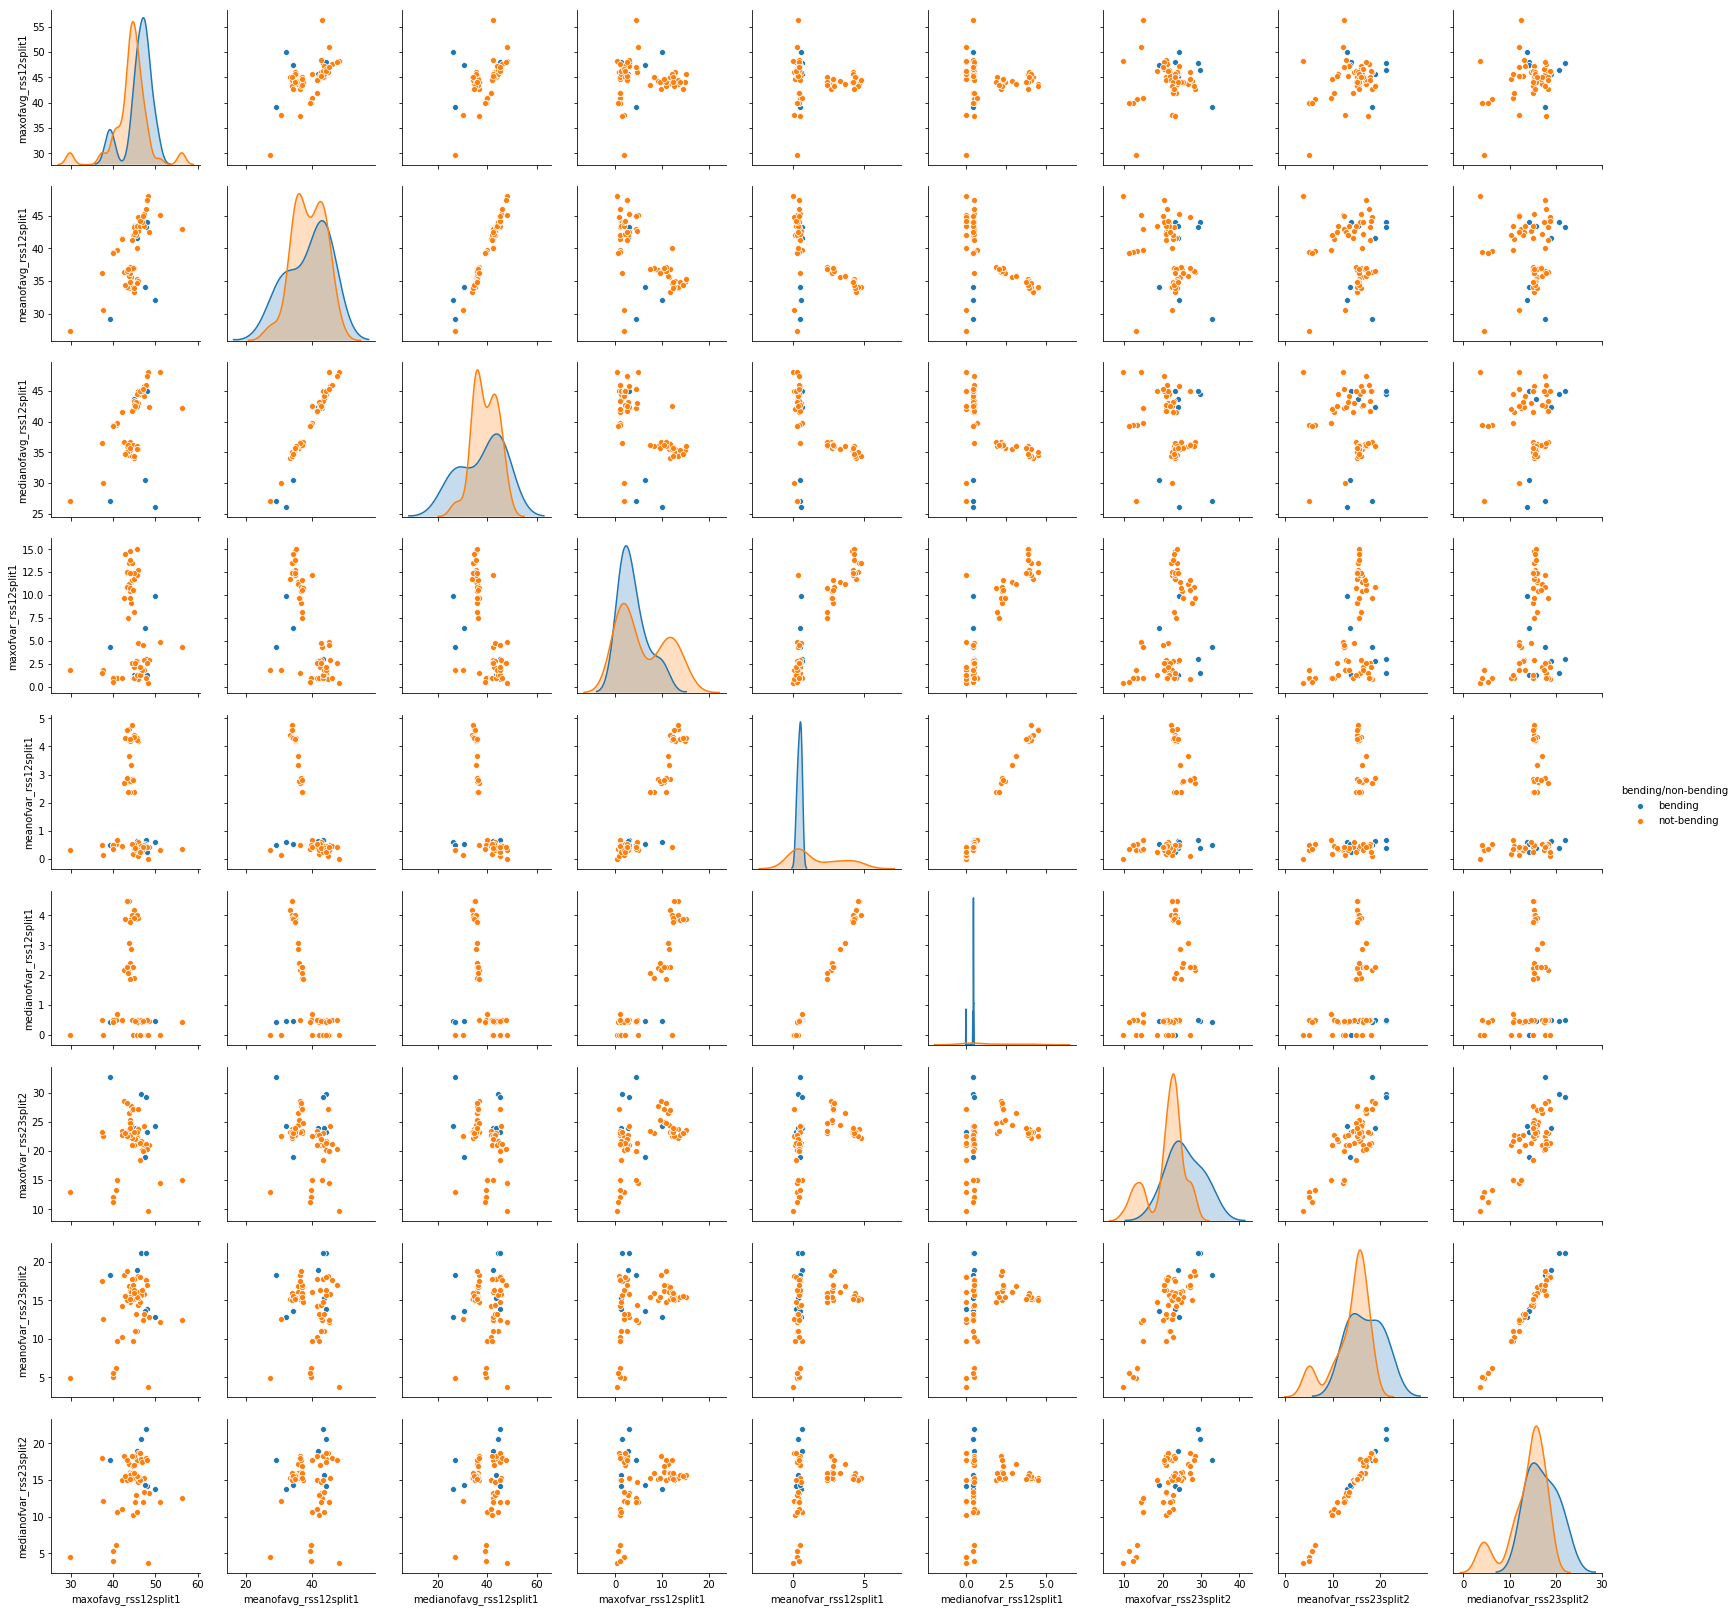

In [0]:

selected_features = ["maxofavg_rss12split1","meanofavg_rss12split1","medianofavg_rss12split1","maxofvar_rss12split1","meanofvar_rss12split1","medianofvar_rss12split1","maxofvar_rss23split2","meanofvar_rss23split2","medianofvar_rss23split2","bending/non-bending"]
train_selected_d2 = df_train_twosplit[selected_features]
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

g=sns.pairplot(train_selected_d2,hue='bending/non-bending')  


In [0]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score




# 1) (d) (iii) Selection of (L,P) pair corresponding to best validation accuracy using recursive feature elimination with cross validation (RFECV) 

69 rows , 841 features ( 20 splits * (6 time series + 1 class label ) * 7 importantly considered time domain features from c(iv) )

Broke each time series in the training set into l=(1,2...20) time series of approximately equal length and using logistic regression to solve the binary classification problem using time-domain features. Utilised 5-fold cross-validation to determine the best value of l and stratified cross validation to deal with class imbalance while performing resampling, as some of the folds may not have any instances of the non dominant class.

Used feature ranking for the selection of the best features with recursive feature elimination with cross-validation. (Function used: RFECV)

In [0]:
time_domain_features =["max","mean","median","min ","stdev","first_quartile","third_quartile"]
time_series_split=[]
for k in range(1,21):
    for u in time_series:
        for w in time_domain_features:
            time_series_split.append(w+"of"+u+"split"+str(k))
time_series_split.append("bending/non-bending")
    
len(time_series_split)    

841

In [0]:

final_validation_accuracy=list()
final_auc_score=list()
final_feat=list()
train_indices=list()
validation_indices=list()

L=range(1,21)
for k in range(1,21):
   
  ts=[]
  for i in activities:
        location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
        for files in os.listdir(location):
            df_tseries_rfe=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
            df_rfe_split=np.array_split(df_tseries_rfe,k) 
            row=[]
            for x in range(0,k):
              for y in range(0,len(time_series),1):
                data = df_rfe_split[x].iloc[:,y]
                row.append(data.max())
                row.append(data.mean())
                row.append(data.median())
                row.append(data.min())
                row.append(data.std())
                row.append(np.quantile(data, .25))
                row.append(np.quantile(data, .75))
   
            if(i=='bending1' or i=='bending2'):
              row.append(1)
            else:
              row.append(0)
          
            ts.append(row)          
  total_tseries_data=pd.DataFrame(ts)
  print(len(total_tseries_data.columns))
  total_tseries_data_x=total_tseries_data.iloc[:,0:len(total_tseries_data)]
  total_tseries_data_y=total_tseries_data.iloc[:,-1]

  strat_cv = StratifiedKFold(n_splits=5,shuffle=False)
  auc_score=[]
  validation_acc=[]
  ret_feat=[]
  tr_index=[]
  va_index=[]
    
  for tr,va in strat_cv.split(total_tseries_data_x,total_tseries_data_y):
        train_x=total_tseries_data_x.iloc[tr.tolist(),:]
        val_x = total_tseries_data_x.iloc[va.tolist(),:]
        train_y = total_tseries_data_y[tr.tolist()]
        val_y   = total_tseries_data_y[va.tolist()] 
        
        train_x.fillna(train_x.mean(),inplace=True)
        val_x.fillna(val_x.mean(),inplace=True)
        mdl = LogisticRegression() 
        rfe = RFECV(estimator=mdl, cv=StratifiedKFold(5), scoring='accuracy')
        fit = rfe.fit(train_x,train_y)
        selected_features = fit.ranking_==1
        
      
        train_x_selected = train_x.loc[:,selected_features]
        val_x_selected = val_x.loc[:,selected_features]
        mdl.fit(train_x_selected,train_y)
        predicted_y = mdl.predict(val_x_selected)
        false_positive_rate,true_positive_rate,_=roc_curve(val_y,predicted_y)
        validation_acc.append(mdl.score(val_x_selected,val_y))
        auc_score.append(auc(false_positive_rate, true_positive_rate))
        ret_feat.append(train_x_selected.columns)
        tr_index.append(tr)
        va_index.append(va)
        
  final_validation_accuracy.append(np.mean(validation_acc))
  final_auc_score.append(np.mean(auc_score))
  q=np.argmax(auc_score)
  final_feat.append(ret_feat[q])
  train_indices.append(tr_index[q])
  validation_indices.append(va_index[q])



In [0]:
total_tseries_data.columns = time_series_split
total_tseries_data.shape

(69, 841)

Selected the best value of split (L) which maximises the Validation accuracy and AUC score based on the table below : In our case as we see ; L=1 where validation accuracy is 0.985 and AUC score is 0.950 is selected . Therefore we consider the best features corresponding to L=1 and then refit our logistic regression model.

In [0]:
L=range(1,21)
auc_acc_df = pd.DataFrame({"L":L,"AUC":final_auc_score,"Accuracy":final_validation_accuracy})
auc_acc_df[['L','AUC','Accuracy']]    


L       AUC  Accuracy
0    1  0.950000  0.985714
1    2  0.683333  0.898901
2    3  0.941667  0.971429
3    4  0.691667  0.913187
4    5  0.766667  0.885714
5    6  0.783333  0.927473
6    7  0.816667  0.900000
7    8  0.883333  0.942857
8    9  0.783333  0.927473
9   10  0.875000  0.928571
10  11  0.791667  0.928571
11  12  0.783333  0.927473
12  13  0.841667  0.871429
13  14  0.875000  0.928571
14  15  0.875000  0.928571
15  16  0.675000  0.884615
16  17  0.625000  0.870330
17  18  0.775000  0.900000
18  19  0.875000  0.928571
19  20  0.658333  0.856044

In [0]:
best_features= final_feat[0]


Int64Index([42], dtype='int64')


# 1) (d) (iv) and 1) (d) (v)



**Confusion matrix ,ROC curve and Area under curve for the classifier on the training data**<br>

Selected the best subset of features corresponding to the split that maximised the validation accuracy and AUC score using  recursive feature elimination with cross-valdation (RFECV) and used this hyperparameter to re-train the logistic regression model and  calculated the logistic regression model score on the training data,confusion matrix, area under the curve and also plotted the receiver operating characteristic curve (ROC) .

Training accuracy achieved is 1.0<br>
Area under the curve is 1.0 

Confusion matrix : 60 non bending instances , 9 bending instances

Accuracy:  1.0
Confusion Matrix :
 [[60  0]
 [ 0  9]]


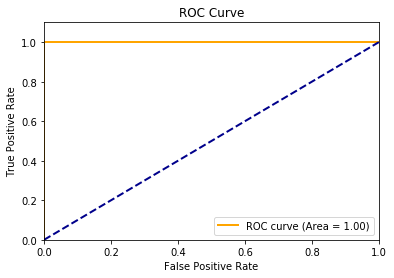

In [0]:
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

if(1):  
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
       
   
        if(i=='bending1' or i=='bending2'):
          row.append(1)
        else:
          row.append(0)
          
        ts.append(row)       
            
  train_data=pd.DataFrame(ts)
    
  area_under_curve = list()

  train_x =train_data.iloc[:,best_features]
  train_y =train_data.iloc[:,[-1]]
  train_x.fillna(train_x.mean(),inplace=True)


mdl = LogisticRegression()
mdl = mdl.fit(train_x, train_y)
actual_y=train_y
accuracy=0

predicted_y=mdl.predict(train_x)
confusion_mat = metrics.confusion_matrix(actual_y,predicted_y)
accuracy=mdl.score(train_x,train_y)
print("Accuracy: ",accuracy)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,predicted_y)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Coefficient estimate and the P values associated with them<br> 
Utilised a chi squared test in order to obtain the p values for the coefficient estimates . From the P value that has been computed we can clearly observe that the best_feature ranked by recursive feature elimination with cross validation (RFECV) at L=1 is statistically significant as P < 0.05 at 5% level of significance.

In [0]:
_,p=chi2(train_x,train_y)
coef_values = pd.DataFrame({"P-values":p})
print(coef_values[['P-values']])


coefficient_estimates= pd.DataFrame({"Feature name":time_series_split[42],"Co-efficient values":mdl.coef_[0].tolist()})
coefficient_estimates[['Feature name','Co-efficient values']]

       P-values
0  9.485738e-15


Feature name  Co-efficient values
0  maxofavg_rss12split2             3.012847

**Confusion matrix ,ROC curve and Area under curve for the classifier on the test data**<br>

Selected the best subset of features corresponding to the split that maximised the validation accuracy and AUC score using  recursive feature elimination with cross-valdation (RFECV) and used this hyperparameter to predict the class labels of the test data after training the logistic regression model and calculated the logistic regression model score on the test data,confusion matrix, area under the curve and also plotted the receiver operating characteristic curve (ROC) .

Test accuracy achieved is 1.0<br>
Area under the curve is 1.0 

Confusion matrix : 15 non bending instances , 4 bending instances

Accuracy:  1.0
Confusion Matrix :
 [[15  0]
 [ 0  4]]


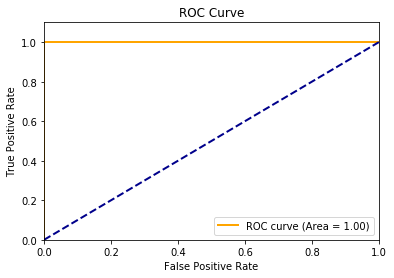

In [0]:
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

if(1):
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_test/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
                
   
        if(i=='bending1' or i=='bending2'):
          row.append(1)
        else:
          row.append(0)
          
        ts.append(row)       
            
  test_data=pd.DataFrame(ts)
    
  area_under_curve = list()

  test_x =test_data.iloc[:,best_features]
  test_y =test_data.iloc[:,[-1]]
  test_x.fillna(test_x.mean(),inplace=True)

actual_y=test_y
accuracy=0

predicted_y=mdl.predict(test_x)
confusion_mat = metrics.confusion_matrix(actual_y,predicted_y)
accuracy=mdl.score(test_x,test_y)
print("Accuracy: ",accuracy)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,predicted_y)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

#(1) (d)(vi)

**Logistic Regression non convergence Warning:**
From the warning we can infer that we have instability in calculating the logistic regression parameters due to well separated classes . This happens when the coefficients do not stop changing even after a large number of iterations .

# 1) (d) (vii)Case Control Sampling


From the confusion matrix of the training data , we see that there are 60 "not bending" instances  but only 9 'bending' instances. So we perfrom downsampling in order to make the number of 'not bending' instances approximately 5 times as the number of 'bending' instances. 


The ratio of no.  of non bending cases to that of no of bending cases ought to be 1:5 . Since we have 60 samples classified as non bending and 9 classified as bending ; downsampling it such that we have about 9 cases for bending and about 45 cases for non bending would be ideal.  This is because sampling more controls than cases leads to a drop in variance of our parameter estimates . But this drop reaches a saturation when the ratio of control to cases ( dominant class to lesser dominant class) reaches 5 :1 . This is the reason for choosing 5 because beyond that it wont make any difference 


In [0]:
print(df_train_tdf.shape)
df_train_tdf_csp = df_train_tdf
randomList = np.random.choice(60, 15, replace=False)
print(randomList)

csp_train_dataset = df_train_tdf_csp.drop(randomList)
csp_train_dataset.shape

(69, 43)
[29 19 15 44 50 30  4  5 34 35 32 13 23 55 54]


(54, 43)

In [0]:
csp_train_dataset['activity'] = csp_train_dataset['activity'].map({'bending': 1, 'non-bending': 0})

Training accuracy achieved is 1.0<br>
Area under the curve is 1.0 

Confusion matrix : 47 non bending instances , 7 bending instances

Accuracy:  1.0
Confusion Matrix :
 [[47  0]
 [ 0  7]]


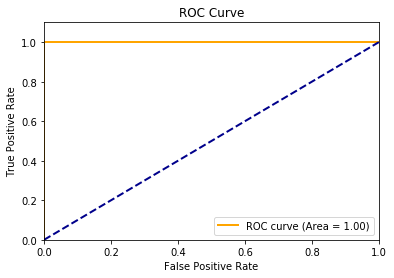

In [0]:
train_x_csp = csp_train_dataset.iloc[:, 0:-2]
train_y_csp = csp_train_dataset.iloc[:,-1]
train_x_csp.fillna(train_x_csp.mean(),inplace=True)
test_x_csp = test_data.iloc[:, 0:-2]
test_y_csp = test_data.iloc[:,-1]


mdl = LogisticRegression()
mdl = mdl.fit(train_x_csp, train_y_csp)
actual_y=train_y_csp
accuracy=0

predicted_y=mdl.predict(train_x_csp)
confusion_mat = metrics.confusion_matrix(actual_y,predicted_y)
accuracy=mdl.score(train_x_csp,train_y_csp)
print("Accuracy: ",accuracy)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,predicted_y)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()



# 1) (e)(i) **Binary Classification Using L1-penalized logistic regression**<br>

L and C are the hyperparameters here .
Therefore cross-validation is done in order to determine both the value of L(no. of splits) and C ( penalty term) that correspond to the maximal validation accuracy and auc score. The LogisticRegressionCV library automatically performs cross validation on the penalty term ('C') for us and therefore we only seek to obtain the value of the split that will correspond to maximum validation accuracy and AUC score through cross validation. 

In [0]:
from sklearn.linear_model import LogisticRegressionCV 
from sklearn import preprocessing


validation_accuracy_tot=list()
area_under_curve_tot=list()
cv_area_under_curve=dict()
pwt_tot=list()

for l in range(1,21):
    print(l)
    area_under_curve = list()
    pwt=list()
    ts=[]
    for i in activities:
        location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
        for files in os.listdir(location):
            df_l1=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
            df_split=np.array_split(df_l1,l)
            row=[]
            for x in range(0,l):
              for y in range(0,len(time_series),1):
                data = df_split[x].iloc[:,y]
                row.append(data.max())
                row.append(data.mean())
                row.append(data.median())
                row.append(data.min())
                row.append(data.std())
                row.append(np.quantile(data, .25))
                row.append(np.quantile(data, .75))
   
   
            if(i=='bending1' or i=='bending2'):
              row.append(1)
            else:
              row.append(0)
          
            ts.append(row)          
    total_tseries_data=pd.DataFrame(ts)
    total_data_x=total_tseries_data.iloc[:,0:len(total_tseries_data)]
    total_data_y=total_tseries_data.iloc[:,-1]
    validation_accuracy=list()
    
    normalize=preprocessing.MinMaxScaler()
    normalized_features=normalize.fit_transform(total_data_x.values)
    tx_cols=total_data_x.columns
    total_data_x=pd.DataFrame(normalized_features,columns=tx_cols)

    strcv = StratifiedKFold(n_splits=5,shuffle=False)
 
    for tr,va in strcv.split(total_data_x,total_data_y):
        train_x = total_data_x.iloc[tr.tolist(),:] 
        val_x   = total_data_x.iloc[va.tolist(),:]
        train_x.fillna(train_x.mean(),inplace=True)
        val_x.fillna(val_x.mean(),inplace=True)
        
        train_y = total_data_y[tr.tolist()] 
        val_y   =  total_data_y[va.tolist()]
    
            
        mdl = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        mdl = mdl.fit(train_x, train_y)
        actual_y=val_y
        
        predicted_y = mdl.predict(val_x)
        
        false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,predicted_y)
        area_under_curve.append(auc(false_positive_rate, true_positive_rate))
        validation_accuracy.append(mdl.score(val_x,val_y))
        pwt.append(mdl.C_)
        
        
    pwt_tot.append(pwt)
    validation_accuracy_tot.append(validation_accuracy)
    area_under_curve_tot.append(area_under_curve)

Selected the best (L,C) pair which maximises the Validation accuracy and AUC score based on the table below :

Selected L =1 and C = 2.782559 as it corresponds to maximal value of validation accuracy and auc score .

In [0]:
l_val=list()
auc_scores_lst =list()
optimal_lagrangian_multiplier =list()
validation_accuracies=list()
for l in range(1,21):
    for s in range(1,6):
        l_val.append(l)
        auc_scores_lst.append(area_under_curve_tot[l-1][s-1])
        optimal_lagrangian_multiplier.append(float(pwt_tot[l-1][s-1]))
        validation_accuracies.append(validation_accuracy_tot[l-1][s-1])
        
        
lambda_selector = pd.DataFrame({"L-values":l_val,"Optimal lambda":optimal_lagrangian_multiplier ,"AUC-scores":auc_scores_lst,"Accuracy":validation_accuracies})
lambda_selector[['L-values','Optimal lambda','AUC-scores',"Accuracy"]]        
        

L-values  Optimal lambda  AUC-scores  Accuracy
0          1        2.782559    1.000000  1.000000
1          1        2.782559    1.000000  1.000000
2          1        2.782559    1.000000  1.000000
3          1        2.782559    1.000000  1.000000
4          1        2.782559    1.000000  1.000000
5          2        2.782559    1.000000  1.000000
6          2        2.782559    0.750000  0.928571
7          2       21.544347    0.708333  0.857143
8          2       21.544347    0.500000  0.857143
9          2        2.782559    1.000000  1.000000
10         3        2.782559    1.000000  1.000000
11         3       21.544347    1.000000  1.000000
12         3       21.544347    0.750000  0.928571
13         3        2.782559    0.500000  0.857143
14         3        2.782559    1.000000  1.000000
15         4        2.782559    1.000000  1.000000
16         4        0.000100    0.500000  0.857143
17         4       21.544347    0.708333  0.857143
18         4        2.782559    0.500000  0.857143
19         4        0.000100    0.500000  0.923077
20         5        0.000100    0.500000  0.857143
21         5        0.000100    0.500000  0.857143
22         5      166.810054    0.458333  0.785714
23         5        2.782559    0.500000  0.857143
24         5        0.000100    0.500000  0.923077
25         6        0.000100    0.500000  0.857143
26         6        0.000100    0.500000  0.857143
27         6    10000.000000    0.458333  0.785714
28         6        2.782559    0.500000  0.857143
29         6        0.000100    0.500000  0.923077
..       ...             ...         ...       ...
70        15        0.000100    0.500000  0.857143
71        15        0.000100    0.500000  0.857143
72        15     1291.549665    0.708333  0.857143
73        15        2.782559    0.750000  0.928571
74        15        0.000100    0.500000  0.923077
75        16        2.782559    1.000000  1.000000
76        16        0.000100    0.500000  0.857143
77        16     1291.549665    0.666667  0.785714
78        16       21.544347    0.750000  0.928571
79        16        2.782559    1.000000  1.000000
80        17        2.782559    1.000000  1.000000
81        17        0.000100    0.500000  0.857143
82        17    10000.000000    0.625000  0.714286
83        17        2.782559    0.750000  0.928571
84        17        0.000100    0.500000  0.923077
85        18        0.000100    0.500000  0.857143
86        18        0.000100    0.500000  0.857143
87        18     1291.549665    0.375000  0.642857
88        18        2.782559    0.750000  0.928571
89        18        0.000100    0.500000  0.923077
90        19        0.000100    0.500000  0.857143
91        19        0.000100    0.500000  0.857143
92        19     1291.549665    0.375000  0.642857
93        19        2.782559    0.750000  0.928571
94        19        0.000100    0.500000  0.923077
95        20        0.000100    0.500000  0.857143
96        20        0.000100    0.500000  0.857143
97        20    10000.000000    0.375000  0.642857
98        20        2.782559    0.750000  0.928571
99        20        0.000100    0.500000  0.923077

[100 rows x 4 columns]

**Confusion matrix ,ROC curve and Area under curve for the classifier on the training data for L-1 penalized logistic regression :**

*Retraining the L1 penalized logistic regression model with the selected best hyperparameters using cross validation :*

Selected the best subset of features corresponding to the split that maximised the validation accuracy and AUC score using recursive feature elimination with cross-valdation (RFECV) and used this hyperparameter to re-train the L-1 penalized logistic regression model and calculated the L-1 penalized logistic regression model score on the training data,confusion matrix, area under the curve and also plotted the receiver operating characteristic curve (ROC) .

Test accuracy achieved is 1.0<br>
Area under the curve is 1.0 

Confusion matrix : 15 non bending instances , 4 bending instances




In [0]:
if(1):
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
            
        if(i=='bending1' or i=='bending2'):
          row.append(1)
        else:
          row.append(0)
          
        ts.append(row)          
  total_tseries_data=pd.DataFrame(ts)
  train_x = total_tseries_data.iloc[:,best_features]
  train_x.fillna(train_x.mean(),inplace=True)
  train_y = total_tseries_data.iloc[:,-1]
  
    


In [0]:
if(1):  
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_test/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
                
        if(i=='bending1' or i=='bending2'):
          row.append(1)
        else:
          row.append(0)
          
        ts.append(row)          
  total_tseries_data=pd.DataFrame(ts)
  test_x = total_tseries_data.iloc[:,best_features]
  test_x.fillna(test_x.mean(),inplace=True)
  test_y = total_tseries_data.iloc[:,-1]
    
    
    

In [0]:
mdl = LogisticRegression(penalty='l1',solver='liblinear',C=2.782559)
log_regress = mdl.fit(train_x, train_y)
actual_y=test_y
predicted_y=mdl.predict(test_x)
cm = metrics.confusion_matrix(actual_y,predicted_y)
print("Confusion Matrix for the test set: ")
print(cm)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,predicted_y)
print("\nAUC score :",auc(false_positive_rate, true_positive_rate))
area_under_curve=auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]

AUC score : 1.0


# 1) (e)(ii) Comparison of L-1 penalized logistic regression with variable selection using P values :

Both the L-1 penalized logistic regression as well as logistic regression with variable selection using recursive feature elimination yield similar performances on the test data . The AUC score and test accuracies are 1.0 in the case of both of these models .

L-1 penalized logistic regression is however more simple to implement and performs variable selection automatically for us as it shrinks few coefficients to zero thus negating their effect . 

The P values obtained using the chi squared test for the coefficient estimates along with the coefficient estimates have been reported below for your reference.


In [0]:
_,p=chi2(train_x,train_y)
coef_values = pd.DataFrame({"P-values":p})
print(coef_values[['P-values']])

coefficient_est= pd.DataFrame({"Feature name":time_series_split[42],"Co-efficient values":mdl.coef_[0].tolist()})
coefficient_est[['Feature name','Co-efficient values']]

       P-values
0  9.485738e-15


Feature name  Co-efficient values
0  maxofavg_rss12split2             7.591188

# 1) (f) (i) Multi class classification using L-1 penalized logistic regression

Generated the training set and validation set with multiple class labels in the response variable and performed cross validation in order to select the split (l) corresponding to the best validation accuracy

In [0]:
validation_accuracy_tot=list()
pwt_tot=list()

for l in range(1,21):
    time_series_l1=dict()
    area_under_curve = list()
    pwt=list()
    ts=[]
    for i in activities:
        location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
        for files in os.listdir(location):
            df_l1=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
            df_split=np.array_split(df_l1,l)
            row=[]
            for x in range(0,l):
              for y in range(0,len(time_series),1):
                data = df_split[x].iloc[:,y]
                row.append(data.max())
                row.append(data.mean())
                row.append(data.median())
                row.append(data.min())
                row.append(data.std())
                row.append(np.quantile(data, .25))
                row.append(np.quantile(data, .75))
   
            row.append((activities.index(i)+1))    
        
            ts.append(row)
    train_data=pd.DataFrame(ts)
    total_data_x=train_data.loc[:,0:len(train_data)]
    total_data_y=train_data.iloc[:,-1]
    validation_accuracy=list()
    
    normalize=preprocessing.MinMaxScaler()
    normalized_features=normalize.fit_transform(total_data_x.values)
    tx_cols=total_data_x.columns
    total_data_x=pd.DataFrame(normalized_features,columns=tx_cols)

    strcv = StratifiedKFold(n_splits=5,shuffle=False)
 
    for tr,va in strcv.split(total_data_x,total_data_y):
        train_x = total_data_x.iloc[tr.tolist(),:] 
        val_x   = total_data_x.iloc[va.tolist(),:]
        train_x.fillna(train_x.mean(),inplace=True)
        val_x.fillna(val_x.mean(),inplace=True)
        train_y = total_data_y[tr.tolist()] 
        val_y   =  total_data_y[va.tolist()]
        mdl = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        mdl = mdl.fit(train_x, train_y)
        pred = mdl.predict(val_x)      
        validation_accuracy.append(mdl.score(val_x,val_y))
        pwt.append(mdl.C_)
        
        
    pwt_tot.append(pwt)
    validation_accuracy_tot.append(max(validation_accuracy))

Selected the best value of split (L) which maximises the Validation accuracy (i.e) L =1

In [0]:

l_val=list(range(1,21))
lambda_selector = pd.DataFrame({"L-values":l_val,"Accuracy":validation_accuracy_tot})
lambda_selector[['L-values',"Accuracy"]]        
        

L-values  Accuracy
0          1  1.000000
1          2  0.916667
2          3  0.882353
3          4  0.823529
4          5  0.909091
5          6  0.823529
6          7  0.823529
7          8  0.727273
8          9  0.666667
9         10  0.833333
10        11  0.750000
11        12  0.750000
12        13  0.818182
13        14  0.818182
14        15  0.764706
15        16  0.764706
16        17  0.764706
17        18  0.705882
18        19  0.705882
19        20  0.764706

Retraining the L1 penalized logistic regression model on the training data with the value of split corresponding to best validation accuracy  ( L=1)

In [0]:
if(1):
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
        row.append((activities.index(i)+1))  
        ts.append(row)          
  total_tseries_data=pd.DataFrame(ts)
  train_x = total_tseries_data.iloc[:,best_features]
  train_x.fillna(train_x.mean(),inplace=True)
  train_y = total_tseries_data.iloc[:,-1]

In [0]:
if(1):  
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_test/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
        row.append((activities.index(i)+1))  
        ts.append(row)            
  total_tseries_data=pd.DataFrame(ts)
  test_x = total_tseries_data.iloc[:,best_features]
  test_x.fillna(test_x.mean(),inplace=True)
  test_y = total_tseries_data.iloc[:,-1]

 Implemented the L-1 penalized logistic regression model on the test data and computed the model.score() for the predictions done on the test data . <br>
 
 The L-1 penalized logistic regression model yielded a 90% test accuracy approximately and thus a test error percentage of about 10% .
 
 
**The confusion matrix for a multi class classification problem can be obtained using the confusion_matrix function from sklearn.metrics .**<br> 
The row names and column names of this confusion matrix are in the order : 

    ['bending1','bending2','cycling','lying','sitting','standing','walking'] 

['bending1',<br>
'bending2',<br>
'cycling',<br>
'lying',<br>
'sitting',<br>
'standing',<br>
'walking']<br>
 
**ROC curve for multi class classification**

The ROC curve for multi class classification can be plotted using the roc_curve() function from the sklearn.metrics library after binarizing the class labels and utilising a OnevsRestclassifier model to fit our training data in order to carry out decision functionality on our test data predictors .   

The  true positive rate and false positive rate generated through the same is passed as parameters to the roc_curve() function for creating the receiver operating characteristic curve plot. 
 
 

In [0]:
mdl = LogisticRegression(penalty='l1',solver='liblinear',C=2.782559)
log_regress = mdl.fit(train_x, train_y)
actual_y=test_y
predicted_y=mdl.predict(test_x)
test_score=mdl.score(test_x,test_y)
test_error= 1-test_score
print("Test error of L1 penalized logistic regression model for multi class classification is ",test_error)
print("Test accuracy of L1 penalized logistic regression model for multi class classification is ",test_score)
confusion_matrix(actual_y, predicted_y)

Test error of L1 penalized logistic regression model for multi class classification is  0.10526315789473684
Test accuracy of L1 penalized logistic regression model for multi class classification is  0.8947368421052632


array([[2, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 3]])

# 1) (f) (ii) Gaussian and Multinomial Naive Bayes models for multi class classification

 **Multi class classification using Gaussian naive bayes **

Generated the training set and validation set with multiple class labels in the response variable and performed cross validation in order to select the split (l) corresponding to the best validation accuracy

In [0]:
from sklearn.naive_bayes import GaussianNB

validation_accuracy_tot=list()

for l in range(1,21):
    print(l)
    ts=[]
    for i in activities:
        location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
        for files in os.listdir(location):
            df_l1=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
            df_split=np.array_split(df_l1,l)
            row=[]
            for x in range(0,1):
              for y in range(0,len(time_series),1):
                data = df_split[x].iloc[:,y]
                row.append(data.max())
                row.append(data.mean())
                row.append(data.median())
                row.append(data.min())
                row.append(data.std())
                row.append(np.quantile(data, .25))
                row.append(np.quantile(data, .75))
   
            row.append((activities.index(i)+1))    
        
            ts.append(row)
    train_data=pd.DataFrame(ts)
    total_data_x=train_data.loc[:,0:len(train_data)]
    total_data_y=train_data.iloc[:,-1]
    validation_accuracy=list()
    
    normalize=preprocessing.MinMaxScaler()
    normalized_features=normalize.fit_transform(total_data_x.values)
    tx_cols=total_data_x.columns
    total_data_x=pd.DataFrame(normalized_features,columns=tx_cols)

    strcv = StratifiedKFold(n_splits=5,shuffle=False)
 
    for tr,va in strcv.split(total_data_x,total_data_y):
        train_x = total_data_x.iloc[tr.tolist(),:] 
        val_x   = total_data_x.iloc[va.tolist(),:]
        train_x.fillna(train_x.mean(),inplace=True)
        val_x.fillna(val_x.mean(),inplace=True)
        train_y = total_data_y[tr.tolist()] 
        val_y   =  total_data_y[va.tolist()]
        mdl = GaussianNB()
        mdl = mdl.fit(train_x, train_y)
        pred = mdl.predict(val_x)      
        validation_accuracy.append(mdl.score(val_x,val_y))
        
        
        
   
    validation_accuracy_tot.append(max(validation_accuracy))

Selected the best value of split (L) which maximises the Validation accuracy (i.e) L =1

In [0]:
l_val=list(range(1,21))
l_selector = pd.DataFrame({"L-values":l_val,"Accuracy":validation_accuracy_tot})
l_selector[['L-values',"Accuracy"]]        
        

L-values  Accuracy
0          1       1.0
1          2       1.0
2          3       1.0
3          4       1.0
4          5       1.0
5          6       1.0
6          7       1.0
7          8       1.0
8          9       1.0
9         10       1.0
10        11       1.0
11        12       1.0
12        13       1.0
13        14       1.0
14        15       1.0
15        16       1.0
16        17       1.0
17        18       1.0
18        19       1.0
19        20       1.0

Retraining the Gaussian Naive Bayes model on the training data with the value of split corresponding to best validation accuracy  ( L=1)

In [0]:
if(1):
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
        row.append((activities.index(i)+1))  
        ts.append(row)          
  total_tseries_data=pd.DataFrame(ts)
  train_x = total_tseries_data.iloc[:,best_features]
  train_x.fillna(train_x.mean(),inplace=True)
  train_y = total_tseries_data.iloc[:,-1]

In [0]:
if(1):  
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_test/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,1)
        row=[]
        for x in range(0,1):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
        row.append((activities.index(i)+1))  
        ts.append(row)            
  total_tseries_data=pd.DataFrame(ts)
  test_x = total_tseries_data.iloc[:,best_features]
  test_x.fillna(test_x.mean(),inplace=True)
  test_y = total_tseries_data.iloc[:,-1]

Implemented the Gaussian Naive Bayes model on the test data and computed the model.score() for the predictions done on the test data . 

The Gaussian Naive Bayes model yielded a 90% test accuracy approximately and thus a test error percentage of about 10% .



In [0]:
mdl = GaussianNB()
mdl.fit(train_x, train_y)
actual_y=test_y
predicted_y=mdl.predict(test_x)
test_score=mdl.score(test_x,test_y)
test_error= 1-test_score
print("Test error of Gaussian Naive Bayes model for multi class classification is ",test_error)
print("Test accuracy of Gaussian Naive Bayes model for multi class classification is ",test_score)
confusion_matrix(actual_y, predicted_y)

Test error of Gaussian Naive Bayes model for multi class classification is  0.0
Test accuracy of Gaussian Naive Bayes model for multi class classification is  1.0


array([[2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 3]])

 **Multi class classification using Multinomial naive bayes **

Generated the training set and validation set with multiple class labels in the response variable and performed cross validation in order to select the split (l) corresponding to the best validation accuracy

In [0]:
from sklearn.naive_bayes import MultinomialNB

validation_accuracy_tot=list()

for l in range(1,21):
    print(l)
    ts=[]
    for i in activities:
        location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
        for files in os.listdir(location):
            df_l1=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
            df_split=np.array_split(df_l1,l)
            row=[]
            for x in range(0,1):
              for y in range(0,len(time_series),1):
                data = df_split[x].iloc[:,y]
                row.append(data.max())
                row.append(data.mean())
                row.append(data.median())
                row.append(data.min())
                row.append(data.std())
                row.append(np.quantile(data, .25))
                row.append(np.quantile(data, .75))
   
            row.append((activities.index(i)+1))    
        
            ts.append(row)
    train_data=pd.DataFrame(ts)
    total_data_x=train_data.loc[:,0:len(train_data)]
    total_data_y=train_data.iloc[:,-1]
    validation_accuracy=list()
    
    normalize=preprocessing.MinMaxScaler()
    normalized_features=normalize.fit_transform(total_data_x.values)
    tx_cols=total_data_x.columns
    total_data_x=pd.DataFrame(normalized_features,columns=tx_cols)

    strcv = StratifiedKFold(n_splits=5,shuffle=False)
 
    for tr,va in strcv.split(total_data_x,total_data_y):
        train_x = total_data_x.iloc[tr.tolist(),:] 
        val_x   = total_data_x.iloc[va.tolist(),:]
        train_x.fillna(train_x.mean(),inplace=True)
        val_x.fillna(val_x.mean(),inplace=True)
        train_y = total_data_y[tr.tolist()] 
        val_y   =  total_data_y[va.tolist()]
        mdl = MultinomialNB()
        mdl = mdl.fit(train_x, train_y)
        pred = mdl.predict(val_x)      
        validation_accuracy.append(mdl.score(val_x,val_y))
        
        
        
   
    validation_accuracy_tot.append(max(validation_accuracy))

Selected the best value of split (L) which maximises the Validation accuracy (i.e) L =3

In [0]:
l_val=list(range(1,21))
l_selector = pd.DataFrame({"L-values":l_val,"Accuracy":validation_accuracy_tot})
l_selector[['L-values',"Accuracy"]]  

L-values  Accuracy
0          1  0.823529
1          2  0.882353
2          3  0.909091
3          4  0.909091
4          5  0.823529
5          6  0.823529
6          7  0.823529
7          8  0.818182
8          9  0.818182
9         10  0.823529
10        11  0.823529
11        12  0.764706
12        13  0.818182
13        14  0.818182
14        15  0.764706
15        16  0.764706
16        17  0.750000
17        18  0.764706
18        19  0.764706
19        20  0.833333

Retraining the Multinomial Naive Bayes model on the training data with the value of split corresponding to best validation accuracy  ( L=3)

In [0]:
if(1):
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_train/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,3)
        row=[]
        for x in range(0,3):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
        row.append((activities.index(i)+1))  
        ts.append(row)          
  total_tseries_data=pd.DataFrame(ts)
  train_x = total_tseries_data.iloc[:,best_features]
  train_x.fillna(train_x.mean(),inplace=True)
  train_y = total_tseries_data.iloc[:,-1]

In [0]:
if(1):  
  ts=[]
  for i in activities:
    location="/gdrive/My Drive/Homeworks/AReM_test/"+str(i)
    for files in os.listdir(location):
        df=pd.read_csv(location+'/'+files,skiprows=4,usecols=range(1,7))
        df_split=np.array_split(df,3)
        row=[]
        for x in range(0,3):
          for y in range(0,len(time_series),1):
            data = df_split[x].iloc[:,y]
            row.append(data.max())
            row.append(data.mean())
            row.append(data.median())
            row.append(data.min())
            row.append(data.std())
            row.append(np.quantile(data, .25))
            row.append(np.quantile(data, .75))
   
        row.append((activities.index(i)+1))  
        ts.append(row)            
  total_tseries_data=pd.DataFrame(ts)
  test_x = total_tseries_data.iloc[:,best_features]
  test_x.fillna(test_x.mean(),inplace=True)
  test_y = total_tseries_data.iloc[:,-1]

Implemented the Multinomial Naive Bayes model on the test data and computed the model.score() for the predictions done on the test data . 

The Multinomial Naive Bayes model yielded a 84.21% test accuracy approximately and thus a test error percentage of about 15.8% .


In [0]:
mdl = MultinomialNB()
mdl.fit(train_x, train_y)
actual_y=test_y
predicted_y=mdl.predict(test_x)
test_score=mdl.score(test_x,test_y)
test_error= 1-test_score
print("Test error of Multinomial Naive Bayes model for multi class classification is ",test_score)
print("Test accuracy of Multinomial Naive Bayes model for multi class classification is ",test_error)

Test error of Multinomial Naive Bayes model for multi class classification is  0.15789473684210525
Test accuracy of Multinomial Naive Bayes model for multi class classification is  0.8421052631578947



# 1) (f) (iii) Comaprison between the models

After comparing all the three models that we used for multi class classification ; the Gaussian Naive Bayes model gave us the best performance with a test accuracy of 1.0  in comparison to Multinomial Naive Bayes and L-1 penalized logistic regression which gave test accuarcies of 0.842 and 0.9 respectively

# For ISLR portions of this homework refer to the pdf file attached inside the compressed .zip folder